In [11]:
import numpy as np
import matplotlib.pyplot as plt
from src.Grid import Grid
from src.BFS import shortest_swap_sequence_nn
from src.Heuristic import heuristic_nn_distance

In [12]:
grid_a = Grid(dimensions=(3, 3))
grid_a.set_random_configuration(n_excitations=4)

grid_b = Grid(dimensions=(3, 3))
grid_b.set_random_configuration(n_excitations=4)

In [13]:
grid_a.show(),
grid_b.show()

-------
|0|1|0|
-------
|0|1|1|
-------
|0|0|1|
-------
-------
|1|1|1|
-------
|0|1|0|
-------
|0|0|0|
-------


In [14]:
sequence = shortest_swap_sequence_nn(grid_a,grid_b)
sequence, len(sequence)

([((0, 0), (0, 1)),
  ((0, 1), (1, 1)),
  ((0, 2), (1, 2)),
  ((1, 2), (2, 2)),
  ((1, 1), (1, 2))],
 5)

In [15]:
heuristic_nn_distance(grid_a.grid,grid_b.grid)

5

In [24]:
init_grid_a = Grid(dimensions=(5,5))
init_grid_a.set_configuration(configuration=np.array([[0,0,0,0,0],
                                                      [0,0,1,0,0],
                                                      [0,1,0,1,0],
                                                      [0,0,1,0,0],
                                                      [0,0,0,0,0]]))
init_grid_b = Grid(dimensions=(5,5))
init_grid_b.set_configuration(configuration=np.array([[0,0,1,0,0],
                                                      [0,0,0,0,0],
                                                      [1,0,0,0,1],
                                                      [0,0,0,0,0],
                                                      [0,0,1,0,0]]))
seeds = 50000
random_grid = Grid(dimensions=(5,5))

distances_a, distances_b = [], []
for seed in range(seeds):
    random_grid.set_random_configuration(n_excitations=init_grid_a.number_of_excitations())
    distances_a.append(heuristic_nn_distance(grid_a=init_grid_a.grid,grid_b=random_grid.grid))
    distances_b.append(heuristic_nn_distance(grid_a=init_grid_b.grid,grid_b=random_grid.grid))
    
    random_grid.reset_configuration()
    

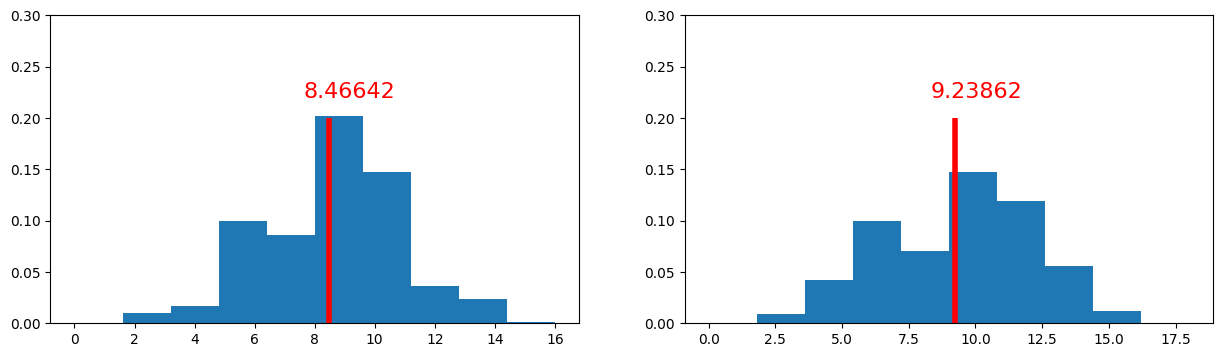

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].hist(distances_a,density=True)
ax[0].vlines(np.mean(distances_a),0,0.2, color='red',lw=4)
ax[0].set_ylim(0,0.3)
ax[0].text(np.mean(distances_a)*0.9,0.22,f'{np.mean(distances_a)}',color='red', fontsize=16)

ax[1].hist(distances_b,density=True)
ax[1].vlines(np.mean(distances_b),0,0.2, color='red',lw=4)
ax[1].set_ylim(0,0.3)
ax[1].text(np.mean(distances_b)*0.9,0.22,f'{np.mean(distances_b)}',color='red', fontsize=16)
plt.show()